# 200 - what to do with missing values

A dataframe can contain NaN's (the code pandas uses for [missing values](https://en.wikipedia.org/wiki/Missing_data)).  
This notebook shows how we can handle missing values.

Basically we have three options:
- Either, drop rows and/or columns that contain to many NaN's
- Or, impute the NaN's (e.g. replace them with the column mean or medium)
- Or, accept the presence of NaN's (decide that they do no real harm)

# 0 - setup notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# 1 - get some data

The city.xlsx spreadsheet we saw in 110_read_data_from_file contains ample NaN's, lets use that spreadsheet.

In [3]:
cities = pd.read_excel('./dat/city.xlsx', sheetname='citydata')
print(cities.shape)
cities.head()

(69, 42)


,city,areaC,areaM,popC,popM,fornB,growP,ppp,share,unempR,...,lfExpF,nrMDs,nrHosp,asLegi,nrMus,nrArts,greens,airQ,effLaw,retFit
0,London,321.0,1584.0,8.20,9.01,0.370,0.009,52.0,0.032,0.083,...,83.3,NaN,255.0,1.0,237.0,307.0,0.14,29.0,1.0,1.0
1,Amsterdam,165.0,807.0,0.76,1.40,0.473,0.012,46.0,0.010,0.054,...,80.8,269.0,7.0,1.0,68.0,141.0,0.57,24.0,1.0,0.0
2,Ankara,31.0,25437.0,3.54,4.77,NaN,0.257,21.2,NaN,0.121,...,NaN,NaN,7.0,1.0,36.0,NaN,0.07,46.0,0.0,0.0
3,Athens,39.0,381.0,0.66,4.01,0.220,NaN,30.5,NaN,0.162,...,NaN,NaN,23.0,1.0,47.0,NaN,NaN,41.0,1.0,NaN
4,Bangkok,1569.0,7762.0,5.72,6.50,0.200,0.031,23.4,0.002,0.022,...,74.0,NaN,173.0,NaN,27.0,NaN,0.24,54.0,1.0,1.0


# 2 - investigate the presence of missing values

### NaNs per column

The first step is to investigate how many NaN's there are in each column.

Use [isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) to check if a column contains nulls (i.e. NaNs ).  
Use [sum()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html) to count the number of NaN=True in a row (sum reads True as 1 and False as 0)

In [4]:
colNaNs = cities.isnull().sum()
print(type(colNaNs))
colNaNs.head()

<class 'pandas.core.series.Series'>


city     0
areaC    3
areaM    4
popC     0
popM     3
dtype: int64

Note that colNaNs is a series, it would be more convenient to work with a dataframe, so make it a dataframe.

In [5]:
colNaNs = pd.DataFrame(cities.isnull().sum())
print(type(colNaNs))
colNaNs.columns= ['nr_of_nans']
colNaNs.head(2)

<class 'pandas.core.frame.DataFrame'>


,nr_of_nans
city,0
areaC,3


We can sort the rows in this dataframe on ascending number of found NaNs with [sort_value()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

In [6]:
colNaNs = colNaNs.sort_values(by='nr_of_nans')
colNaNs.head(2)

,nr_of_nans
city,0
tram,0


In [7]:
colNaNs.tail(10)

,nr_of_nans
poverR,21
fornB,21
domTour,22
share,23
percHE,25
nrArts,26
annTour,28
nrMDs,29
mtCom,31
retFit,32


We could view all 69 rows to get an idea about the presences of NaNs.   
However, to get a quick impression it is easier to use a bar graph.

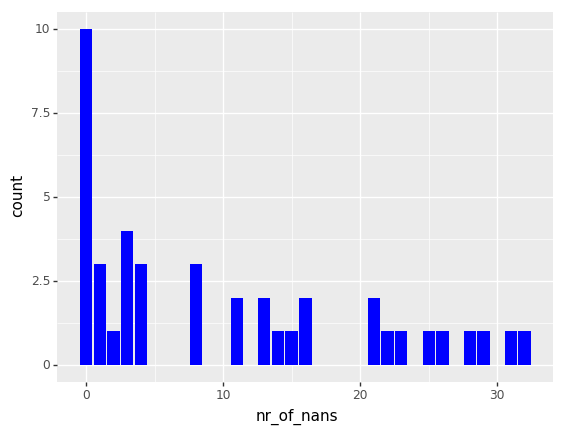

<ggplot: (10656737)>

In [8]:
from plotnine import *
ggplot(data=colNaNs, mapping=aes(x='nr_of_nans')) + geom_bar(fill='blue')

The bar-chart shows that there are 10 columns that have 0 NaNs, there are 3 with 1 NaN etc.

### NaNs per row

We can investigate the NaNs in rows in the same way.  
However we first have to [transpose](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html) (i.e. switch rows and columns) the dataframe.

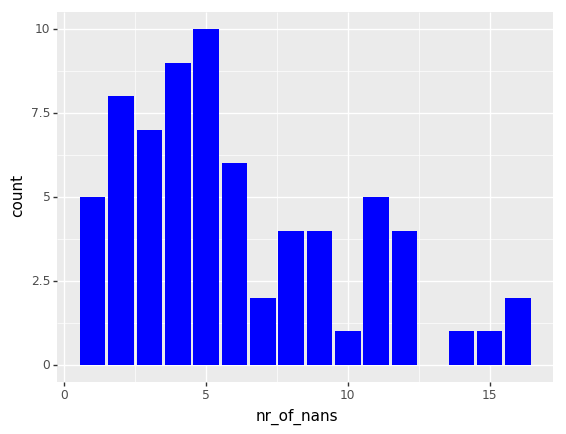

<ggplot: (13224838)>

In [9]:
rowNaNs = pd.DataFrame(cities.transpose().isnull().sum())
rowNaNs.columns= ['nr_of_nans']
rowNaNs = rowNaNs.sort_values(by='nr_of_nans')
ggplot(data=rowNaNs, mapping=aes(x='nr_of_nans')) + geom_bar(fill='blue')

Note that rowNaNs is sorted, so if we want to know which 10 rows contain the most NaNs, we can simply ask for tail(10)

In [10]:
rowNaNs.tail(10)

,nr_of_nans
43,11
17,11
45,12
12,12
24,12
33,12
40,14
3,15
47,16
35,16


Now we know how many NaNs there are and where they are located, we can decide what to do with them.

# 3 - remove rows and/or columns with NaN's


### remove rows and columns that are all NaN

Rows and columns that only contain NaNs can be removed.


In [11]:
#-- read df with a row and a column of all NaNs --
dat = pd.read_csv('.\dat\how_all.csv')
dat

,col1,col2,col3,col4,col5
0,1.0,NaN,1.0,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1.0,NaN,1.0
3,1.0,NaN,1.0,1.0,1.0


In [12]:
# -- remove the NaN row---
dat = dat.dropna(axis='rows',how='all')
dat

,col1,col2,col3,col4,col5
0,1.0,NaN,1.0,1.0,NaN
2,1.0,NaN,1.0,NaN,1.0
3,1.0,NaN,1.0,1.0,1.0


In [13]:
# -- remove the NaN coulmn -----
dat = dat.dropna(axis='columns',how='all')
dat

,col1,col3,col4,col5
0,1.0,1.0,1.0,NaN
2,1.0,1.0,NaN,1.0
3,1.0,1.0,1.0,1.0


### Remove all rows and columns that do not have enough non-NaNs

We can demand that a row or column must have at least a certain number of valid entries (i.e. non_NaNs)  
An example for columns is given below (for rows we can do the same)

In [14]:
#--- read dataframe ------------
dat = pd.read_csv('.\dat\how_all.csv')
dat

,col1,col2,col3,col4,col5
0,1.0,NaN,1.0,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1.0,NaN,1.0
3,1.0,NaN,1.0,1.0,1.0


In [15]:
#-- remove columns that have not at least 3 non_NaNs---
dat = dat.dropna(axis='columns',thresh=3)
dat

,col1,col3
0,1.0,1.0
1,NaN,NaN
2,1.0,1.0
3,1.0,1.0


### remove all rows or columns that have 1 or more NaNs

You can decide that a row or column may not contain any NaNs (only valid entries are allowed).

In [16]:
#--- read dataframe ------------
dat = pd.read_csv('.\dat\how_all.csv')
dat.iloc[3,1] = 1
dat.iloc[0,1] = 1
dat.iloc[0,4] = 1
dat

,col1,col2,col3,col4,col5
0,1.0,1.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1.0,NaN,1.0
3,1.0,1.0,1.0,1.0,1.0


In [17]:
# -- remove all rows that contain 1 or more NaNs -------
dat = dat.dropna(axis='rows')
dat

,col1,col2,col3,col4,col5
0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0


## When to drop NaNs?

When a row or column consists (almost) solely of NaNs we can drop them without further reflection.  
However, in all other cases we should use careful judgement.

Take for example the cites.xlsx spreadsheet. Suppose we decide to drop all cities with more than 10 NaNs. 
- That would remove cities that have their statistics not in order  
(probably cities from less developed nations, if so, dropping would introduce [selection bias](https://en.wikipedia.org/wiki/Selection_bias) to our sample of cities).    
- Furthermore not all the 42 variables will be equally important to our research.  
We might drop cases that only have NaNs for unimportant variables and keep cities that have NaNs on crucial ones.

In general we should ask ourself.  
- Can the models that I will use to analyze the data handle NaNs? 
    - if they can not, you have no choice than to remove all NaNs, 
    - if they can, you should concentrate on acceptable information loss and avoiding bias.
- Do I loose real information when I drop a row or column?
- Am I introducing bias by dropping?

# 4 - impute NaNs

We can decide to [impute](https://en.wikipedia.org/wiki/Imputation_%28statistics%29) (replace) NaNs with the mean or the medium of a column.

Note that this makes only sense for columns (i.e. replace the NaN for gdp with the mean gdp for all countries).  
It makes no sense to do this for rows (replacing the NaN for gdp with the mean of population, area size and HDI score would be silly).

If you have ordinal data you can only use the medium (the mean is not defined for ordinal data).   
If you have interval or ratio data you can use the mean or the medium.  
Probably you should use the mean, except in cases where a few extreme outliers are present.

Here is one relatively straightforward way to impute NaNs in the share column of the cities data frame.

In [18]:
#-- count the NaNs in the share column -------
print(cities['share'].isnull().sum())
#-- show the first 5 cases ------
cities['share'].head()

23


0    0.032
1    0.010
2      NaN
3      NaN
4    0.002
Name: share, dtype: float64

In [20]:
########## impute column NaNs #####################

#--- caculate the mean share -----
meanshare = cities['share'].mean()

import numpy as np
#--- define replacement function -----
def impute_share(x):
    if np.isnan(x): return meanshare
    else:           return x
    
#-- apply imputation ----------------
cities['share'] = cities['share'].apply(impute_share)

####################################################

#-- check the results
print(cities['share'].isnull().sum())
cities['share'].head()

0


0    0.032000
1    0.010000
2    0.016435
3    0.016435
4    0.002000
Name: share, dtype: float64

### Do not use fillna

Pandas has a function [fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).  This function is **NOT** useful for our purposes. 

In our case: 
- each column contains its own type of data and 
- we want to impute with the mean or the medium.

fillna does not support this

# 5 - accept NaNs

NaNs are not abominations that must be removed at all costs.  

There is only one situation in which NaNs must be removed: the model with with you are going to analyze the data can not handle NaNs.  
There is one situation in which you probably should remove NaNs: more than say 75% of the values in a row or column are NaNs

In all other situations you probably should keep the NaNs (unless you can proof that removing them does no real harm). 

# see also

Here is a [link to a useful blog](https://chrisalbon.com/python/pandas_missing_data.html) that explains the handeling of NaNs.